In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# (metrics)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# (models)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

**Data Visualisation**

In [ ]:
def categorize(col):
    numerical,category=[],[]
    for i in col:
        if data[i].dtype ==object:
            category.append(i)
        else:
            numerical.append(i)
    print("The numerical features {}:".format(numerical))
    print("The categorical features {}:".format(category))
    return category,numerical


In [ ]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.displot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.displot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)

    plt.show()
    plt.close()


In [ ]:
df = pd.read_csv('houses_to_rent.csv')

In [ ]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [ ]:
df.describe(include = 'object')

,city,floor,animal,furniture
count,10692,10692,10692,10692
unique,5,35,2,2
top,São Paulo,-,acept,not furnished
freq,5887,2461,8316,8086


In [ ]:
df.shape

(10692, 13)

In [ ]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


**Data Cleaning**

In [ ]:
df['floor'].unique()

array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

In [ ]:
df.loc[df['floor'] == '-', 'floor'] = 0
df['floor'] = df['floor'].astype('int64')

**Outlier detection**

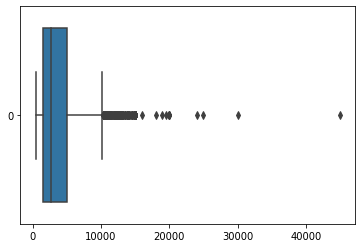

In [ ]:
sns.boxplot(data = df['rent amount (R$)'], orient='horizontal')

In [ ]:
# (copy of our dataset)
data = df.copy()

In [ ]:
city_group = data.groupby('city')['rent amount (R$)']

Q1 = city_group.quantile(.25)
Q3 = city_group.quantile(.75)

# (IQR - Interquartile Range)
IQR = Q3 - Q1

# (Limits)
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# (storing the new data)
new_data = pd.DataFrame()

for city in city_group.groups.keys():
    is_city = data['city'] == city
    accepted_limit = ((data['rent amount (R$)'] >= lower[city]) &
                     (data['rent amount (R$)'] <= upper[city]))
    
    select = is_city & accepted_limit
    data_select = data[select]
    new_data = pd.concat([new_data, data_select])
    
data = new_data.copy()

In [ ]:
# (New dataset)
data.describe()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9.974000e+03,9974.000000,9974.000000,9974.000000,9.974000e+03
mean,134.483958,2.413575,2.101364,1.479848,5.071185,1.101394e+03,3300.496691,315.949469,44.834369,4.762867e+03
std,550.700299,1.120755,1.300777,1.482660,6.051531,1.601059e+04,2497.261703,3198.118033,34.438465,1.665255e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,55.000000,2.000000,1.000000,0.000000,1.000000,1.900000e+02,1500.000000,34.000000,20.000000,1.990000e+03
50%,85.000000,2.000000,2.000000,1.000000,3.000000,5.500000e+02,2500.000000,110.000000,33.000000,3.327000e+03
75%,160.000000,3.000000,3.000000,2.000000,8.000000,1.133000e+03,4233.750000,315.000000,58.000000,5.855250e+03
max,46335.000000,10.000000,10.000000,12.000000,301.000000,1.117000e+06,12000.000000,313700.000000,181.000000,1.120000e+06


**Exploratory Data Analysis (EDA)**


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpret

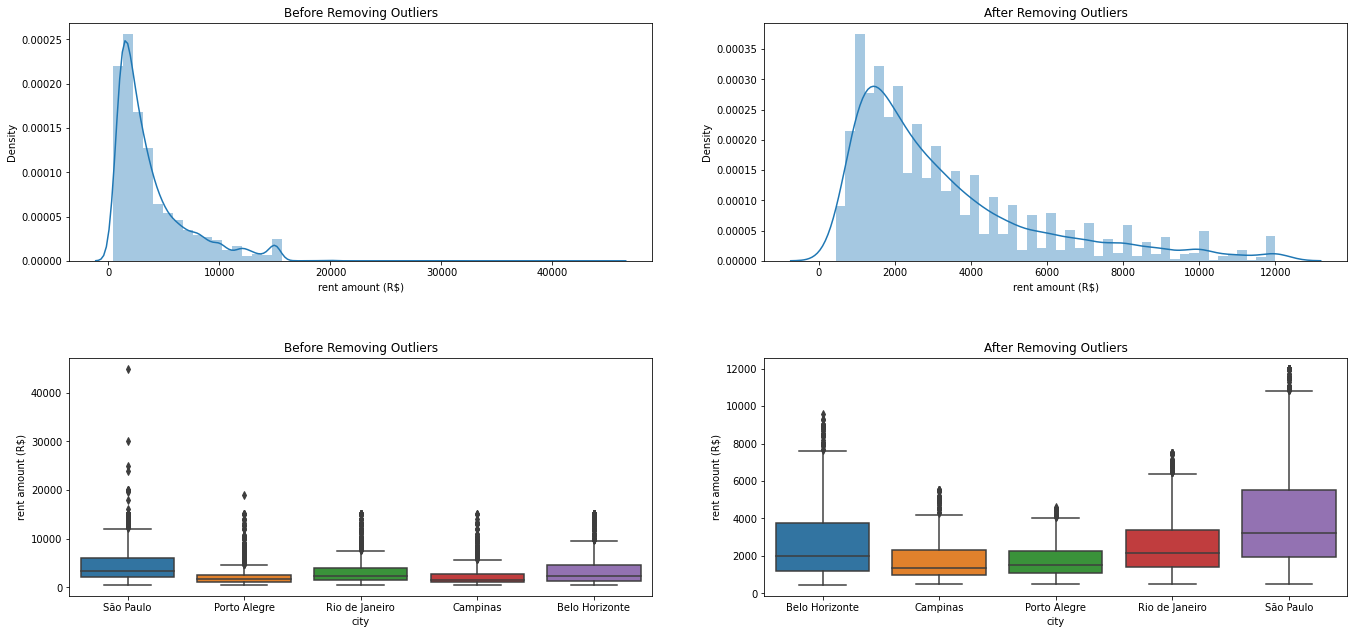

In [ ]:
# (data before and after treat outliers)

plt.figure(1, figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.distplot(df['rent amount (R$)'])
plt.title('Before Removing Outliers')
plt.subplot(2, 2, 2)
sns.distplot(data['rent amount (R$)'])
plt.title('After Removing Outliers')
plt.subplot(2, 2, 3)
plt.figure(1, figsize=(20, 12))
sns.boxplot(df['city'], df['rent amount (R$)']).set_title('Before Removing Outliers')
plt.subplot(2, 2, 4)
sns.boxplot(data['city'], data['rent amount (R$)']).set_title('After Removing Outliers')
plt.tight_layout(pad=5.0)
plt.show()

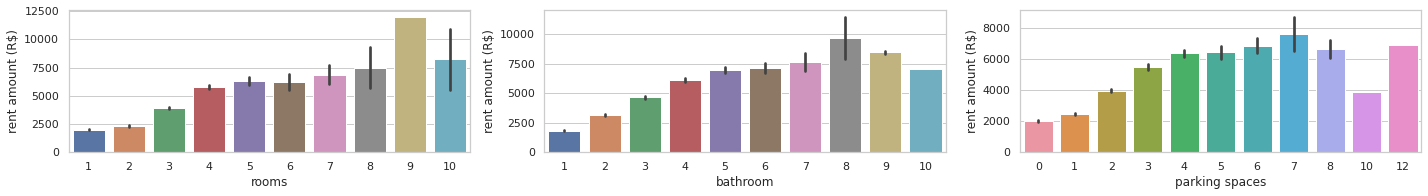

In [ ]:
numerical1 = ['rooms', 'bathroom', 'parking spaces']
plt.figure(figsize=(20, 5))
sns.set(style = 'whitegrid')
i = 1
for feature in numerical1:
    plt.subplot(2, 3, i)
    sns.barplot(x = feature, y= 'rent amount (R$)', data=data)
    i+=1
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

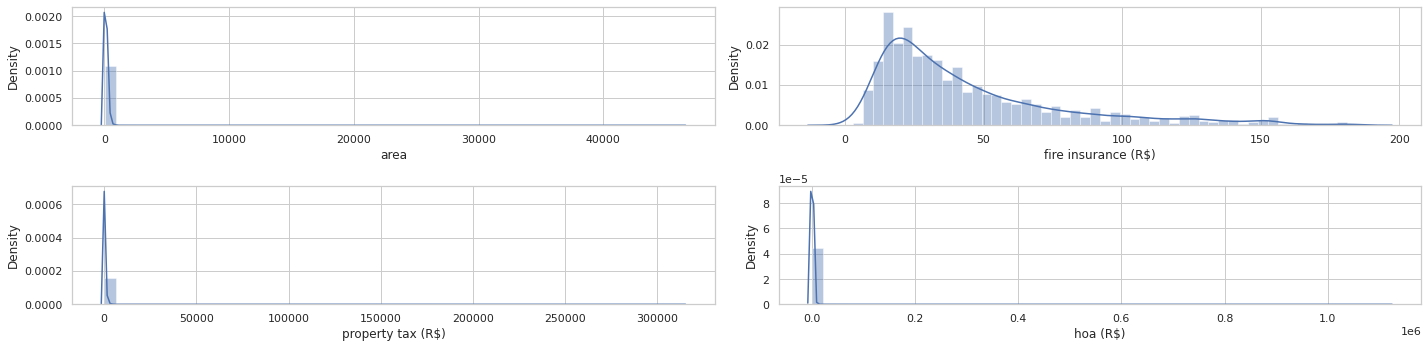

In [ ]:
numerical2 = ['area', 'fire insurance (R$)', 'property tax (R$)', 'hoa (R$)']
plt.figure(figsize=(20, 5))
j = 1
for feature2 in numerical2:
    plt.subplot(2, 2, j)
    sns.distplot(data[feature2])
    j+=1
plt.tight_layout()

All distributions are right skewed ditributions.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

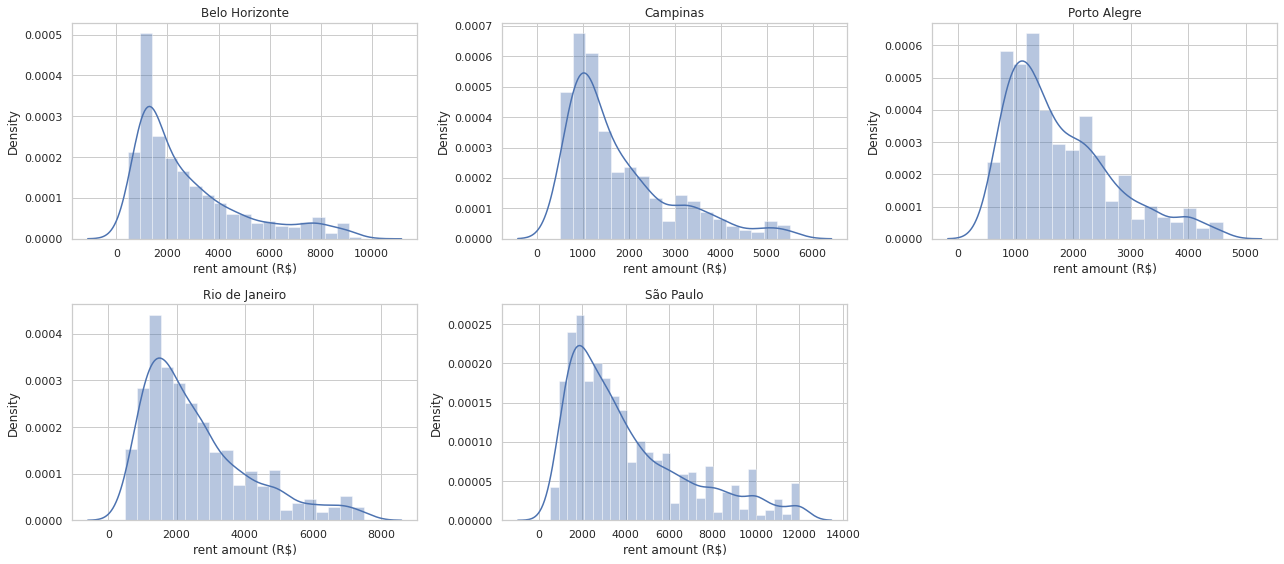

In [ ]:
plt.figure(figsize=(18, 8))

i = 1
for city in data['city'].unique():
    plt.subplot(2, 3, i)
    plt.title(city)
    city_name = data.loc[data['city'] == city]
    sns.distplot(city_name['rent amount (R$)'])
    i+=1
    

plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

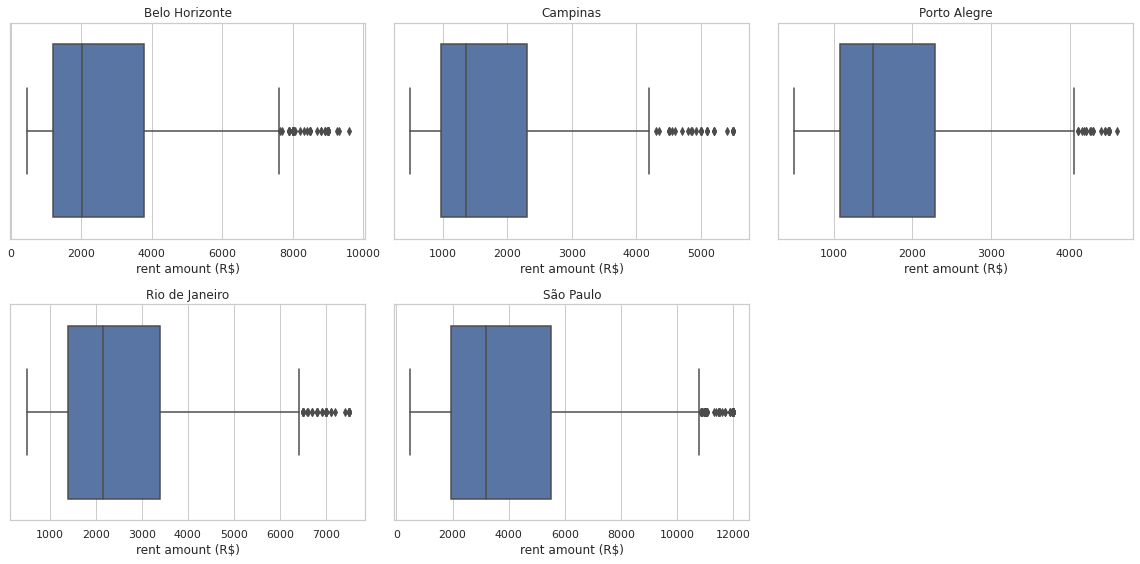

In [ ]:
plt.figure(figsize=(16, 8))

i = 1
step = 5000
for city in data['city'].unique():
    if step < 2000:
        step = 2000
    plt.subplot(2, 3, i)
    plt.title(city)
    city_name = data.loc[data['city'] == city]
    sns.boxplot(city_name['rent amount (R$)'])    
    step-=3000
    i+=1

    

plt.tight_layout()
plt.show()


Sao Paulo have the most expensive rent.

In [ ]:
categorical,numerical = categorize(data.columns)

The numerical features ['area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)']:
The categorical features ['city', 'animal', 'furniture']:


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


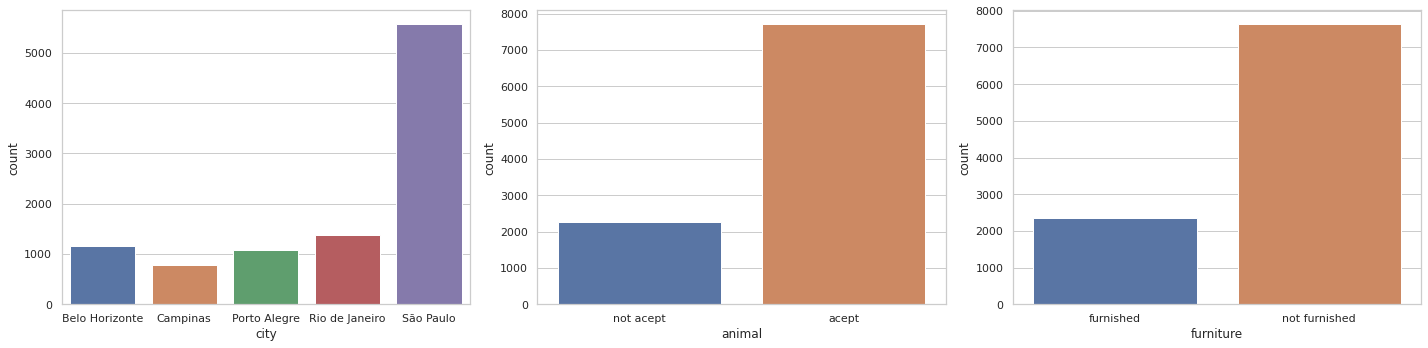

In [ ]:
plt.figure(figsize=(20,5))
j =1
for i in categorical:
    plt.subplot(1,3,j)
    sns.countplot(data[i])
    j =j+1
plt.tight_layout()

*   Sao Paulo is the city with more houses.
*   Most of the houses accept animals.
*   Most of the houses are not furnished.


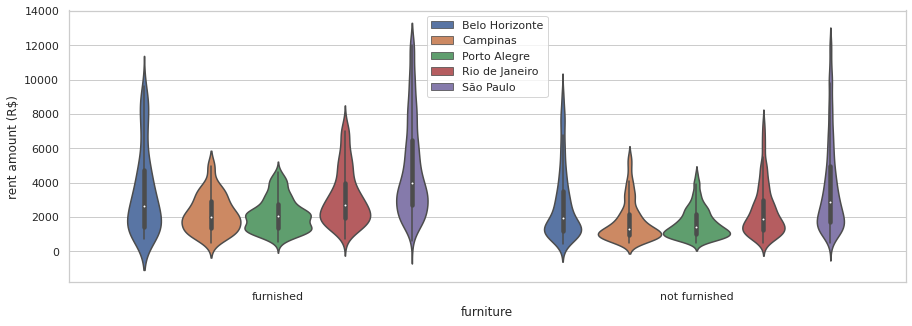

In [ ]:
# (rent impacted by furniture)
plt.figure(figsize = (15, 5))
sns.violinplot(x ='furniture', y ='rent amount (R$)', data = data,hue ='city').legend(loc='upper center')

*   Furnished houses are more expensive than the not furnished houses.
*   Furnished houses are more distributed than the not furnished houses.

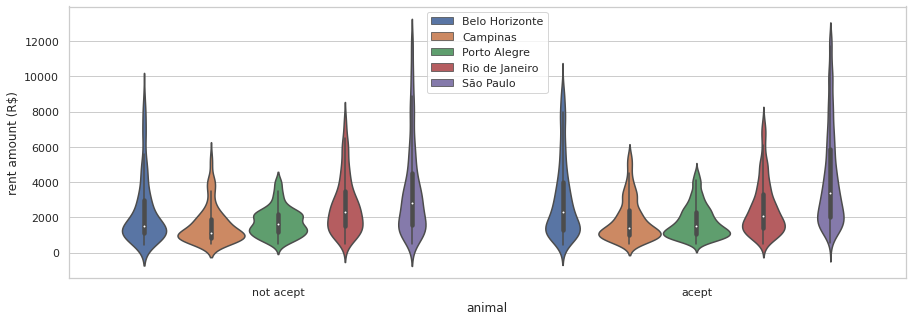

In [ ]:
# (rent is impacted by animal acceptance)
plt.figure(figsize = (15, 5))
sns.violinplot(x ='animal', y ='rent amount (R$)', data = data,hue ='city').legend(loc='upper center')

Animal acceptance have the least influence on rent.

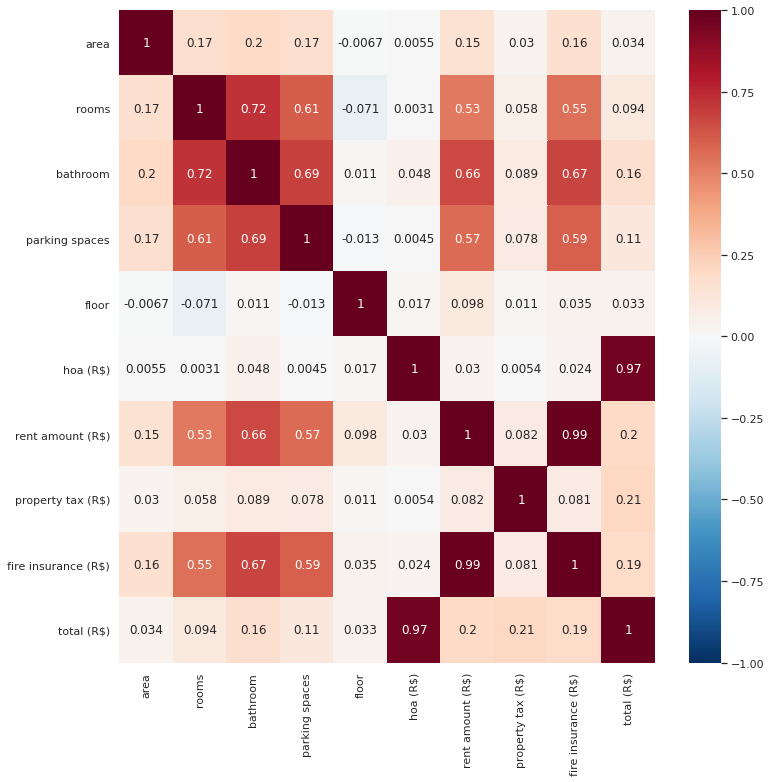

In [ ]:
# (correlation between features)
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, cmap='RdBu_r', linecolor='black',vmin=-1, vmax=1)

In [ ]:
cols = ['city', 'rooms', 'bathroom', 'parking spaces', 'fire insurance (R$)',
        'furniture']
x = data[cols]
y = data['rent amount (R$)']

In [ ]:
labelencoder = LabelEncoder()
x.loc[:, 'furniture'] = labelencoder.fit_transform(x.loc[:, 'furniture'])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
dummy = pd.get_dummies(x, columns=['city'])
dummy.drop(columns = ['city_Belo Horizonte'], inplace=True)
x = dummy

In [ ]:
# (splitting into training data and test data)
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size = 0.3,
                                                   random_state = 0)


**Model Prediction**

In [ ]:
# (list)
acc = []
# (alpha for GridSearch)
parameters1= [{'alpha': [0.0001, 0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]
# (models)
regressors = {'Linear Regression': LinearRegression(),
              'Ridge Model': Ridge(alpha=0.1),
              'Decision Tree': DecisionTreeRegressor(),
              'Random Forest': RandomForestRegressor(random_state=1),
              'SVR': SVR(),
              'KNN': KNeighborsRegressor(),
              'Lasso': Lasso(),
              'GridSearchRidge': GridSearchCV(Ridge(), parameters1, cv=4),
              'GridSearchLasso': GridSearchCV(Lasso(), parameters1, cv=4)
             }

In [ ]:
# (perform the model, predict the rent)
for i in regressors:
    model = regressors.get(i)
    # here we create a condition because for grid we want to perform the model with the best estimator
    if i == 'GridSearchRidge' or i == 'GridSearchLasso':
        model.fit(x_train, y_train).best_estimator_ 
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    print(i)
    print('MAE:', mean_absolute_error(y_test, prediction))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))
    print('R2:', r2_score(y_test, prediction))
    print('*' * 40)
    acc.append([i, mean_absolute_error(y_test, prediction), np.sqrt(mean_squared_error(y_test, prediction)), r2_score(y_test, prediction)])


Linear Regression
MAE: 248.99289449586422
RMSE: 372.61524993623067
R2: 0.978435563565699
****************************************
Ridge Model
MAE: 248.98912238422673
RMSE: 372.61549419180534
R2: 0.9784355352939869
****************************************
Decision Tree
MAE: 138.80667693255705
RMSE: 342.6586599387321
R2: 0.9817635505720236
****************************************
Random Forest
MAE: 138.56658264274424
RMSE: 289.09334903245565
R2: 0.9870194509399147
****************************************
SVR
MAE: 967.9108643603793
RMSE: 1802.1468969150171
R2: 0.49557426076295563
****************************************
KNN
MAE: 160.46795856999665
RMSE: 315.0206757145174
R2: 0.9845867231272063
****************************************
Lasso
MAE: 247.54779770272805
RMSE: 372.82011833939237
R2: 0.9784118442672647
****************************************
GridSearchRidge
MAE: 248.95527069031553
RMSE: 372.6177481766285
R2: 0.9784352744024033
****************************************
GridSearchLa

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

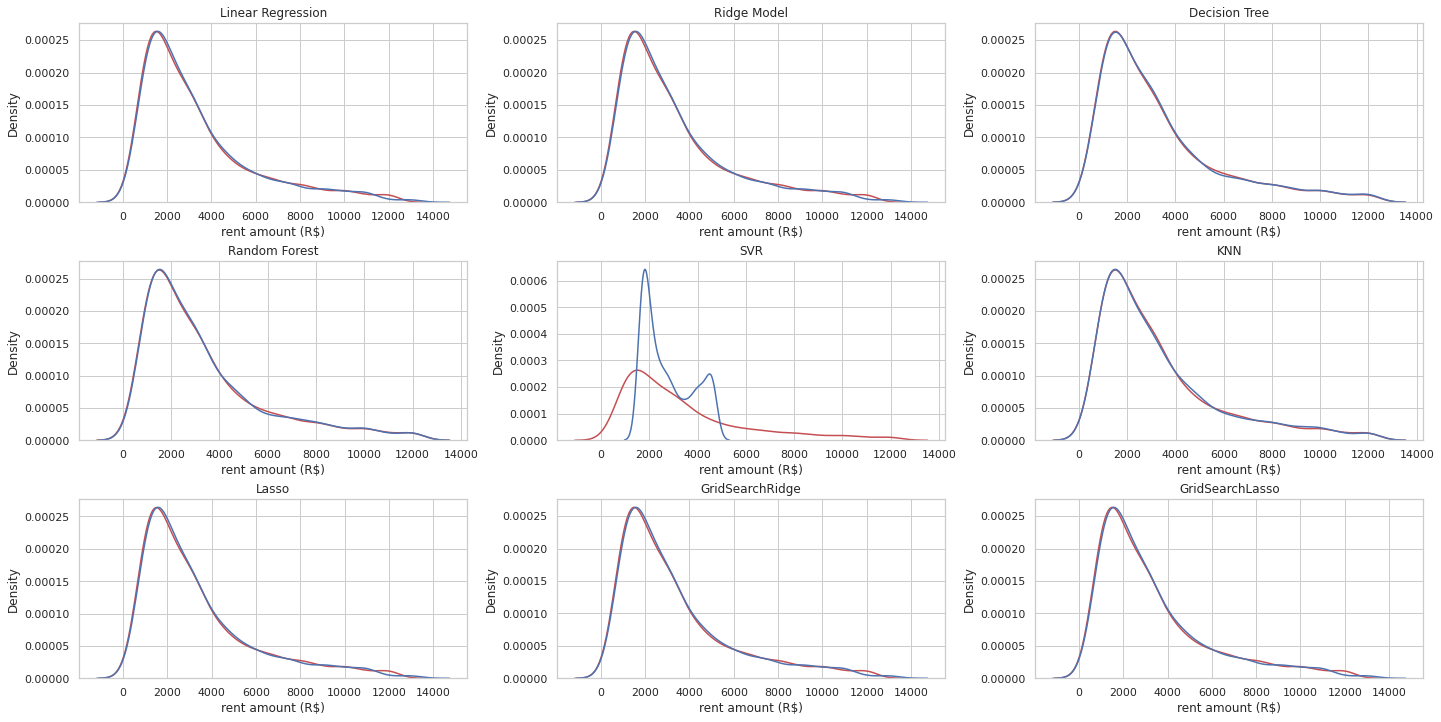

In [ ]:
# (visualize the plot)
j = 1
plt.figure(figsize=(20,10))
for i in regressors:
    model = regressors.get(i)
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    plt.subplot(3, 3, j)
    plt.title(i)
    ax1 = sns.distplot(y_test,hist=False,kde =True,color ="r",label ="Actual Value")
    sns.distplot(prediction ,color ="b",hist = False,kde =True, label = "Predicted Value",ax =ax1).set_title(i)
    j+=1
plt.tight_layout(pad = 0.5)

In [ ]:
# (sort the list of results)
acc.sort(key = lambda y:y[3], reverse=True)
acc = pd.DataFrame(data = acc, columns=['model', 'MAE', 'RMSE', 'R2'])

**Analysis of results**

In [ ]:
# (Visualization)
acc.head(len(regressors))

,model,MAE,RMSE,R2
0,Random Forest,138.566583,289.093349,0.987019
1,KNN,160.467959,315.020676,0.984587
2,Decision Tree,138.806677,342.658660,0.981764
3,Linear Regression,248.992894,372.615250,0.978436
4,GridSearchLasso,248.992745,372.615261,0.978436
5,Ridge Model,248.989122,372.615494,0.978436
6,GridSearchRidge,248.955271,372.617748,0.978435
7,Lasso,247.547798,372.820118,0.978412
8,SVR,967.910864,1802.146897,0.495574


RandomForest is our best perfomer in all three metrics.

Text(0.5, 1.0, 'R^2 Using Test Data')

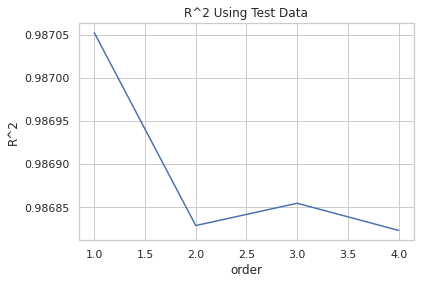

In [ ]:
# since RandomForest it's our best model, let's perform a rsquare test with differents
# degrees of polynomial transformation to see if we can improve it
rfr = RandomForestRegressor(random_state=1)
rfr.fit(x_train, y_train)
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train)
    
    x_test_pr = pr.fit_transform(x_test)    
    
    rfr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(rfr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')